# Parsing PDFs Homework

With the power of pdfminer, pytesseract, Camelot, and Tika, let's analyze some documents!

> If at any point you think, **"I'm close enough, I'd just edit the rest of it in Excel"**: that's fine! Just make a note of it.

## A trick to use again and again

### Approach 1

Before we get started: when you want to take the first row of your data and set it as the header, use this trick.

In [191]:
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


In [ ]:
# Set the first column as the columns
df.columns = df.loc[0]

# Drop the first row
df = df.drop(0)

df

🚀 Done!

### Approach 2

Another alternative is to use `.rename` on your columns and just filter out the columns you aren't interested in. This can be useful if the column name shows up multiple times in your data for some reason or another.

In [150]:
# Starting with the same-ish data...
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'fruit name', 'likes' ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,fruit name,likes
4,sweet potato,45
5,peach,12


In [192]:
df = df.rename(columns={
    0: 'fruit name',
    1: 'likes'
})
#column fruit name can't have fruit name in it
#df = df[df['likes'] > 10]
df = df[df['fruit name'] != 'fruit name']
df

,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


🚀 Done!

### Useful tips about coordinates

If you want to grab only a section of the page [Kull](https://jsoma.github.io/kull/#/) might be helpful in finding the coordinates.

> **Alternatively** run `%matplotlib notebook` in a cell. Afterwards, every time you use something like `camelot.plot(tables[0]).show()` it will get you nice zoomable, hoverable versions that include `x` and `y` coordinates as you move your mouse.

Coordinates are given as `"left_x,top_y,right_x,bottom_y"` with `(0,0)` being in the bottom left-hand corner.

Note that all coordinates are strings, for some reason. It won't be `[1, 2, 3, 4]` it will be `['1,2,3,4']`

# The homework

This is **mostly Camelot work**, because I don't really have any good image-based PDFs to stretch your wings on tesseract. If you know of any, let me know and I can put together another couple exercises.

## Prison Inmates

Working from [InmateList.pdf](InmateList.pdf), save a CSV file that includes every inmate.

* Make sure your rows are *all data*, and you don't have any people named "Inmate Name."


In [535]:
import camelot
import pandas as pd
import matplotlib.pyplot as plt
#use camelot to scrape pdf

In [572]:
inmate_tables = camelot.read_pdf('InmateList.pdf', flavor = 'stream', pages = '1-end', table_regions=['15,655,375,85'])


In [573]:
#count the number of tables
inmate_tables


<TableList n=16>

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


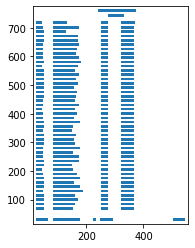

In [557]:
#see the basic outline
camelot.plot(inmate_tables[0], kind='text').show()

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


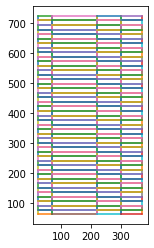

In [545]:
camelot.plot(inmate_tables[0], kind='grid').show()

In [575]:
#data check
inmate_tables[15].df

,0,1,2,3
0,27065,"WHITFIELD, JAMES",ECHC,07/05/2021
1,145872,"WHITFIELD, KYA S",ECHC,06/21/2021
2,150613,"WHITTAKER, DAQUAN J",ECCF,05/06/2021
3,149101,"WHITTAKER, TANJA M",ECHC,12/01/2020
4,1007,"WILEY, KURT R",ECCF,09/17/2020
5,147398,"WILKINS, ODELL M",ECHC,11/25/2020
6,98502,"WILLIAMS, ADAM W",ECHC,02/25/2021
7,132212,"WILLIAMS, BRANDON",ECHC,09/16/2020
8,105145,"WILLIAMS, DAVID A",ECHC,07/03/2021
9,97828,"WILLIAMS, DEREK A",ECCF,02/22/2021


In [581]:
#loop over the tables to create a compiled df
dfs = [table.df for table in inmate_tables]


In [582]:
full_list = pd.concat(dfs, ignore_index=True)


In [583]:
full_list

,0,1,2,3
0,70693,"ABDALLAH, MICHAEL",ECHC,04/30/2021
1,152645,"ABDI, ABDI",ECCF,06/20/2021
2,144666,"ABDULLAH, DHAFIR",ECCF,06/17/2021
3,156374,"ACEVEDO, CARLOS",ECHC,06/06/2021
4,57243,"ACKER, RAYMOND P",ECCF,11/02/2020
...,...,...,...,...
679,18303,"ZANGHI, SANTINO J",ECHC,05/24/2021
680,155109,"ZARCONE, THOMAS E",ECHC,06/27/2021
681,63815,"ZIELINSKI, LARRY",ECHC,07/06/2021
682,20740,"ZIELINSKI, LAWRENCE T",ECCF,11/04/2020


In [38]:
#quick way to get 16 csvs of each page
inmate_tables.export('inmatelist.csv', f='csv')

In [580]:
#export, it worked!
full_list.to_csv('full_list.csv', index=False)

In [1]:
#experient with pdfminer.six
from pdfminer.high_level import extract_text

In [2]:
text = extract_text('InmateList.pdf')

In [3]:
text[:200]

"Erie County Sheriff's Office \n\nInmate Roster\n\nInmate Name\n\nFacility\n\nBooking Date\n\n104048\n\nALBERTSON, ANDREW\n\nICN #\n\n70693\n\n152645\n\n144666\n\n156374\n\n57243\n\n68579\n\n45262\n\n75738\n\n1577\n\n148951\n\n139806\n\n12"

In [53]:
#experiment with tika
import tika
from tika import parser

In [54]:
parsed = parser.from_file('InmateList.pdf')


In [55]:
parsed.keys()

dict_keys(['metadata', 'content', 'status'])

In [59]:
#parsed['metadata']
#parsed['status']
#print(parsed['content'].strip())

## WHO resolutions

Using [A74_R13-ef](A74_R13-en.pdf), what ten member countries are given the highest assessments?
n.pd
* You might need to have two separate queries, and combine the results: that last page is pretty awful!
* Always rename your columns
* Double-check that your sorting looks right......
* You can still get the answer even without perfectly clean data

In [631]:
who_tables = camelot.read_pdf('A74_R13-en.pdf', flavor = 'stream', pages = '1-end', split_text=False)
#who_tables = camelot.read_pdf('A74_R13-en.pdf', process_background=True)
#who_tables = camelot.read_pdf('A74_R13-en.pdf', copy_text=['v'])

In [632]:
who_tables

<TableList n=6>

In [633]:
who_table = who_tables[0].df
# i need to make this a df, hey you dot "do this"
who_table.head(5)

,0,1
0,Members and,WHO scale
1,Associate Members,for 2022–2023
2,,%
3,Afghanistan,0.0070
4,Albania,0.0080


/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


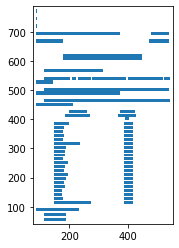

In [634]:
camelot.plot(who_tables[0], kind='text').show()

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


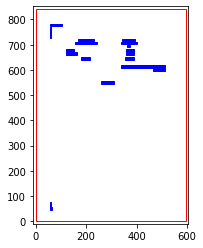

In [635]:
camelot.plot(who_tables[5], kind='contour').show()

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


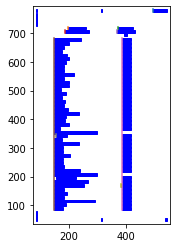

In [636]:
camelot.plot(who_tables[4], kind='textedge').show()

In [637]:
dfs2 = [table.df for table in who_tables]
who_list = pd.concat(dfs2, ignore_index=True)


In [638]:
who_list.tail(25)

,0,1,2,3,4
200,Turkmenistan,0.0330,NaN,NaN,NaN
201,Tuvalu,0.0010,NaN,NaN,NaN
202,Uganda,0.0080,NaN,NaN,NaN
203,Ukraine,0.0570,NaN,NaN,NaN
204,United Arab Emirates,0.6160,NaN,NaN,NaN
205,United Kingdom of Great Britain and,,NaN,NaN,NaN
206,Northern Ireland,4.5673,NaN,NaN,NaN
207,United Republic of Tanzania,0.0100,NaN,NaN,NaN
208,United States of America,22.0000,NaN,NaN,NaN
209,Uruguay,0.0870,NaN,NaN,NaN


In [639]:
who_list.head(15)
#cut off top 3, then add columns back in

,0,1,2,3,4
0,Members and,WHO scale,NaN,NaN,NaN
1,Associate Members,for 2022–2023,NaN,NaN,NaN
2,,%,NaN,NaN,NaN
3,Afghanistan,0.0070,NaN,NaN,NaN
4,Albania,0.0080,NaN,NaN,NaN
5,Algeria,0.1380,NaN,NaN,NaN
6,Andorra,0.0050,NaN,NaN,NaN
7,Angola,0.0100,NaN,NaN,NaN
8,Antigua and Barbuda,0.0020,NaN,NaN,NaN
9,Argentina,0.9151,NaN,NaN,NaN


In [640]:
who_list.tail(-3)
#cut off first few lines of unnecessary material

,0,1,2,3,4
3,Afghanistan,0.0070,NaN,NaN,NaN
4,Albania,0.0080,NaN,NaN,NaN
5,Algeria,0.1380,NaN,NaN,NaN
6,Andorra,0.0050,NaN,NaN,NaN
7,Angola,0.0100,NaN,NaN,NaN
...,...,...,...,...,...
220,,Zimbabwe,,0.0050,
221,,TOTAL,,100.000,
222,,,,,"Seventh plenary meeting, 31 May 2021"
223,,,,,A74/VR/7


In [641]:
#Set the first column as the columns
who_list.columns = who_list.loc[0]

In [642]:
#drop last page, add back later Zambia 0.0090, Zimbabwe 0.0050

who_list = who_list.iloc[:-10, :]


In [755]:
who_list.head(7)

,members,Who_scale,NaN,NaN,NaN
3,Afghanistan,0.0070,NaN,NaN,NaN
4,Albania,0.0080,NaN,NaN,NaN
5,Algeria,0.1380,NaN,NaN,NaN
6,Andorra,0.0050,NaN,NaN,NaN
7,Angola,0.0100,NaN,NaN,NaN
8,Antigua and Barbuda,0.0020,NaN,NaN,NaN
9,Argentina,0.9151,NaN,NaN,NaN


In [869]:
#do some renaming of columns to clean up
who_list = who_list.rename(columns = {
    'Members and': 'members',
    'WHO scale': 'Who_scale'
})


In [645]:
who_list.head(3)

,members,Who_scale,NaN,NaN,NaN
0,Members and,WHO scale,NaN,NaN,NaN
1,Associate Members,for 2022–2023,NaN,NaN,NaN
2,,%,NaN,NaN,NaN


In [646]:
#more cleaning, cut columns containing this type of info

who_list = who_list[(who_list['members']!= "Members and") & (who_list['members']!= "Associate Members") & (who_list['Who_scale']!= "%")]



In [648]:
who_list.tail(5)

,members,Who_scale,NaN,NaN,NaN
210,Uzbekistan,0.0320,NaN,NaN,NaN
211,Vanuatu,0.0010,NaN,NaN,NaN
212,Venezuela (Bolivarian Republic of),0.7280,NaN,NaN,NaN
213,Viet Nam,0.0770,NaN,NaN,NaN
214,Yemen,0.0100,NaN,NaN,NaN


In [649]:
#I can't figure out what to do about situations where text is split, cleaning a few rows by hand with this export
who_list.to_csv('who_list.csv', index=False)



In [654]:
#read back in cleaned file
df_who_cleaned = pd.read_csv('who_list_cleaned.csv', index=False))


In [655]:
#df_who_cleaned
new_frame = df_who_cleaned.sort_values(by="Who_scale", ascending=False).head(10)

In [652]:
new_frame

,members,Who_scale
187,USA,22.0000
35,China,12.0058
86,Japan,8.5645
66,Germany,6.0904
185,UK and Northern Ireland,4.5673
62,France,4.4273
84,Italy,3.3072
23,Brazil,2.9482
31,Canada,2.7342
144,Russian Federation,2.4052


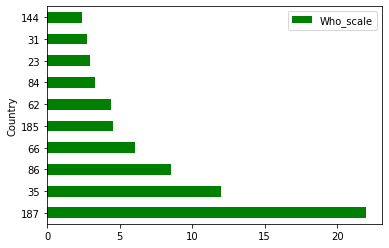

In [372]:
new_frame = df_who_cleaned.sort_values(by="Who_scale", ascending=False).head(10).plot(kind = 'barh', color="g", xlabel="Country", ylabel="Who contribution")


## The Avengers

Using [THE_AVENGERS.pdf](THE_AVENGERS.pdf), approximately how many lines does Captain America have as compared to Thor and Iron Man?

* Character names only: we're only counting `IRON MAN` as Iron Man, not `TONY`.
* Your new best friend might be `\n`
* Look up `.count` for strings

In [103]:
from pdfminer.high_level import extract_text
text = extract_text('THE_AVENGERS.pdf')

In [821]:
text

'Marvel’s THE AVENGERS\n\nWritten By\n\nJoss Whedon\n\nStory By\nZak Penn and Joss Whedon\n\nBased on the characters appearing in the comic books\nPublished by MARVEL Comics\n\nTranscribed to PDF using:\nCeltx Studio | 2012\n\nComposed In Celtx Studio\nWith the help of\nSiOmniaFicta’s Script\non fanfiction.net\n\nENTERTAINMENT PURPOSES ONLY\n\n\x0c1\n\n2\n\n3\n\n1\n\nEXT. UNKNOWN AREA OF SPACE\n\nSpace, a floating staircase among the rocks...THE OTHER\nspeaks to a DISEMBODIED FIGURE in a chair.\n\nTHE OTHER hands LOKI a scepter with a glowing blue gem...\n\nTHE OTHER (V.O)\n\nThe Tesseract has awakened. It is\non a little world, a human world.\nThey would wield its power.\n\nTHE OTHER (V.O)\nBut our ally knows its workings as\nthey never will. He is ready to\nlead. And our force...\n\nTHE OTHER (V.O)\n\n...our Chitauri, will follow. The\nworld will be his...the universe,\nyours. And the humans, what can\nthey do but burn?\n\nThe CHITAURI put on their face mask and get ready.\n\nA 3d mo

In [825]:
my_series = pd.Series(text)

In [873]:
my_series.str.count('THOR\n\n')

0    41
dtype: int64

In [872]:
my_series.str.count('IRON MAN\n\n')

0    17
dtype: int64

In [835]:
my_series.str.count('CAPTAIN AMERICA')

0    40
dtype: int64

In [853]:
my_series.str.count('INTERCOM VOICE')

0    10
dtype: int64

In [837]:
my_series.str.contains('Aardvark', case=False, regex=False)

0    False
dtype: bool

## COVID data

Using [covidweekly2721.pdf](covidweekly2721.pdf), what's the total number of tests performed in Minnesota? Use the Laboratory Test Rates by County of Residence chart.

* You COULD pull both tables separately OR you could pull them both at once and split them in pandas.
* Remember you can do things like `df[['name','age']]` to ask for multiple columns

In [706]:
covid_table_1 = camelot.read_pdf('covidweekly2721.pdf', flavor = 'stream', pages = '6', table_regions =['415, 575, 599, 35'] )
covid_table_1[0]

<Table shape=(46, 3)>

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


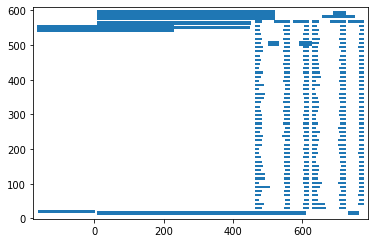

In [707]:
camelot.plot(covid_table_1[0], kind='text').show()

In [709]:
mn_table = covid_table_1[0].df



In [710]:
mn_table

,0,1,2
0,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128"
2,Anoka,"545,958","15,714"
3,Becker,"59,238","17,540"
4,Beltrami,"60,345","13,085"
5,Benton,"77,865",
6,,"9,953","26,976"
7,Big Stone,"13,220","26,356"
8,Blue Earth,"136,895","20,641"
9,Brown,"55,709","22,097"


In [711]:
covid_table_2 = camelot.read_pdf('covidweekly2721.pdf', flavor = 'stream', pages = '6', table_regions =['632, 532, 800, 35'] )
covid_table_2[0]

<Table shape=(44, 3)>

In [696]:
#covid_table_2[0]
mn_table_2 = covid_table_2[0].df

In [712]:
mn_table_2 

,0,1,2
0,Martin,"39,876","19,974"
1,McLeod,"61,300","17,111"
2,Meeker,"37,736","16,351"
3,Mille Lacs,"44,688","17,369"
4,Morrison,"59,179","17,961"
5,Mower,"79,446","20,061"
6,Murray,"15,175","18,167"
7,Nicollet,"66,163","19,585"
8,Nobles,"30,979","14,185"
9,Norman,"11,471","17,489"


In [728]:
#combine the two dfs
frames = [mn_table, mn_table_2 ]
mn_compiled = pd.concat(frames)

In [729]:
#export, it worked!
mn_compiled.to_csv('mn_tests_compiled.csv', index=False)

In [739]:
#needed to clean up the odd mistake on Benton by hand, read back in the cleaned csv
df_mntests = pd.read_csv('mn_tests_cleaned.csv')
df_mntests


,0,1,2
0,County,Number of Tests,Cumulative Rate
1,Aitkin,"19,204","12,128"
2,Anoka,"545,958","15,714"
3,Becker,"59,238","17,540"
4,Beltrami,"60,345","13,085"
...,...,...,...
84,Wilkin,"7,973","12,570"
85,Winona,"106,625","20,970"
86,Wright,"194,085","14,621"
87,Yellow Medicine,"19,972","20,239"


In [740]:
df_mntests.columns = df_mntests.loc[0]
#df_mntests
# Drop the first row
df_mntests = df_mntests.drop(0)


In [759]:
#get rid of last row
df_mntests = df_mntests[:-1]




In [753]:
df_mntests['Number of Tests'] = df_mntests['Number of Tests'].astype(int)
df_mntests.dtypes

0
County             object
Number of Tests     int64
Cumulative Rate    object
dtype: object

In [754]:
df_mntests['Number of Tests'].sum()

9498032

## Theme Parks

Using [2019-Theme-Index-web-1.pdf](2019-Theme-Index-web-1.pdf), save a CSV of the top 10 theme park groups worldwide.

* You can clean the results or you can restrict the area the table is pulled from, up to you

In [862]:
themepark_table = camelot.read_pdf('2019-Theme-Index-web-1.pdf', flavor = 'stream', pages = '11', table_regions=['30, 410, 400, 295'])



In [811]:
themepark_table[0]

<Table shape=(12, 5)>

In [864]:
toptenparks = themepark_table[0].df

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


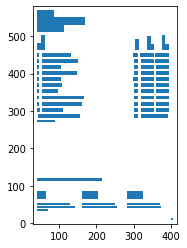

In [807]:
camelot.plot(themepark_table[0], kind='text').show()

In [865]:
toptenparks


,0,1,2,3,4
0,1,WALT DISNEY ATTRACTIONS,-0.8%,"155,991,000","157,311,000"
1,2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000*"
2,3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
3,4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
4,5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
5,6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
6,7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
7,8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
8,9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"
9,10,PARQUES REUNIDOS,6.2%,"22,195,000","20,900,000"


In [866]:
toptenparks = toptenparks.rename(columns={
    0: 'rank',
    1: 'group',
    2: 'percent change',
    3: 'attendance 2019',
    4: 'attendance 2019'
})


In [867]:
toptenparks


,rank,group,percent change,attendance 2019,attendance 2019
0,1,WALT DISNEY ATTRACTIONS,-0.8%,"155,991,000","157,311,000"
1,2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000*"
2,3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
3,4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
4,5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
5,6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
6,7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
7,8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
8,9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"
9,10,PARQUES REUNIDOS,6.2%,"22,195,000","20,900,000"


In [868]:
toptenparks.to_csv('toptenparks.csv', index=False)

## Hunting licenses

Using [US_Fish_and_Wildlife_Service_2021.pdf](US_Fish_and_Wildlife_Service_2021.pdf) and [a CSV of state populations](http://goodcsv.com/geography/us-states-territories/), find the states with the highest per-capita hunting license holders.

In [472]:
#read in data with camelot, flavor lattice since it seems structured

import pandas as pd
tables = camelot.read_pdf('US_Fish_and_Wildlife_Service_2021.pdf', flavor = 'lattice', pages = '1-end', strip_text=' .\n')
tables


<TableList n=1>

In [473]:
#make a data frame
df1=tables[0].df
df1.head(5)


,0,1,2,3,4,5,6,7
0,State,PaidHuntingLicenseHolders*,"ResidentHuntingLicenses,Tags,PermitsandStamps","Non-ResidentHuntingLicenses,Tags,PermitsandStamps","TotalHuntingLicense,Tags,Permits&Stamps**","Cost-ResidentHuntingLicenses,Tags,PermitsandSt...","Cost-Non-ResidentHuntingLicenses,Tags,Permitsa...",GrossCost-HuntingLicenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"
4,AS,0,0,0,0,$0,$0,$0


In [476]:
df1.columns = df1.loc[0]
df1 = df1.drop(0)
#set column names as header, drop an unnecessary line

In [477]:
df1.head(3)

,State,PaidHuntingLicenseHolders*,"ResidentHuntingLicenses,Tags,PermitsandStamps","Non-ResidentHuntingLicenses,Tags,PermitsandStamps","TotalHuntingLicense,Tags,Permits&Stamps**","Cost-ResidentHuntingLicenses,Tags,PermitsandStamps","Cost-Non-ResidentHuntingLicenses,Tags,PermitsandStamps",GrossCost-HuntingLicenses
1,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071"
2,AL,"452,400","601,683","45,397","647,080","$9,700,295","$6,715,734","$16,416,029"
3,AR,"343,300","349,098","150,728","499,826","$7,851,601","$11,271,653","$19,123,254"


In [478]:
df1.shape

(57, 8)

In [479]:
#get simpler column names
df1 = df1.rename(columns={df1.columns[2]: 'reslicenses', 
                          df1.columns[4]: 'total_licenses',
                         df1.columns[0]: 'state'
                         })

In [480]:
df1.tail(5)

,state,PaidHuntingLicenseHolders*,reslicenses,"Non-ResidentHuntingLicenses,Tags,PermitsandStamps",total_licenses,"Cost-ResidentHuntingLicenses,Tags,PermitsandStamps","Cost-Non-ResidentHuntingLicenses,Tags,PermitsandStamps",GrossCost-HuntingLicenses
53,WA,"171,940","688,501","13,365","701,866","$16,004,985","$1,063,616","$17,068,601"
54,WI,"666,670","3,965,367","236,639","4,202,006","$28,526,992","$7,884,672","$36,411,664"
55,WV,"205,447","484,447","143,966","628,413","$3,800,948","$4,881,189","$8,682,137"
56,WY,"135,228","186,849","82,865","269,714","$11,254,147","$23,660,065","$34,914,212"
57,Total:,"15,202,669","34,712,508","3,878,354","38,590,862","$545,673,926","$372,804,333","$918,478,259"


In [400]:
#drop the total line so I can merge with the population csv
#df1 = df1.drop(57)


In [481]:
df1.shape

(57, 8)

In [176]:
#import csv, merge
#!ls


In [482]:
df1.tail(3)

,state,PaidHuntingLicenseHolders*,reslicenses,"Non-ResidentHuntingLicenses,Tags,PermitsandStamps",total_licenses,"Cost-ResidentHuntingLicenses,Tags,PermitsandStamps","Cost-Non-ResidentHuntingLicenses,Tags,PermitsandStamps",GrossCost-HuntingLicenses
55,WV,"205,447","484,447","143,966","628,413","$3,800,948","$4,881,189","$8,682,137"
56,WY,"135,228","186,849","82,865","269,714","$11,254,147","$23,660,065","$34,914,212"
57,Total:,"15,202,669","34,712,508","3,878,354","38,590,862","$545,673,926","$372,804,333","$918,478,259"


In [528]:
df_pop = pd.read_csv('statesclean - us-states-territories (1).csv')

In [529]:
df_pop.columns
#why is data type object?

Index(['Type', 'Name', 'Abbreviation', 'Capital', 'Population (2019)',
       'area (square miles)'],
      dtype='object')

In [530]:
df_pop = df_pop.rename(columns ={
    'Population (2019)': 'Population',
})

In [486]:
df_pop.columns

Index(['Type', 'Name', 'Abbreviation', 'Capital', 'Population',
       'area (square miles)'],
      dtype='object')

In [487]:
df_pop.head(5)

,Type,Name,Abbreviation,Capital,Population,area (square miles)
0,State,Alabama,AL,Montgomery,4903185,"52,420"
1,State,Alaska,AK,Juneau,731545,"665,384"
2,State,Arizona,AZ,Phoenix,7278717,"113,990"
3,State,Arkansas,AR,Little Rock,3017804,"53,179"
4,State,California,CA,Sacramento,39512223,"163,695"


In [488]:
df_pop.dtypes

Type                   object
Name                   object
Abbreviation           object
Capital                object
Population              int64
area (square miles)    object
dtype: object

In [490]:
df_pop.dtypes

Type                   object
Name                   object
Abbreviation           object
Capital                object
Population              int64
area (square miles)    object
dtype: object

In [491]:
#merge on state, Abbrevation
df1 = df1.merge(df_pop, left_on = 'state', right_on = 'Abbreviation')

In [492]:
df1.head(1)



,state,PaidHuntingLicenseHolders*,reslicenses,"Non-ResidentHuntingLicenses,Tags,PermitsandStamps",total_licenses,"Cost-ResidentHuntingLicenses,Tags,PermitsandStamps","Cost-Non-ResidentHuntingLicenses,Tags,PermitsandStamps",GrossCost-HuntingLicenses,Type,Name,Abbreviation,Capital,Population,area (square miles)
0,AK,"93,559","423,501","59,235","482,736","$4,859,356","$9,046,715","$13,906,071",State,Alaska,AK,Juneau,731545,"665,384"


In [493]:
df1.dtypes

state                                                     object
PaidHuntingLicenseHolders*                                object
reslicenses                                               object
Non-ResidentHuntingLicenses,Tags,PermitsandStamps         object
total_licenses                                            object
Cost-ResidentHuntingLicenses,Tags,PermitsandStamps        object
Cost-Non-ResidentHuntingLicenses,Tags,PermitsandStamps    object
GrossCost-HuntingLicenses                                 object
Type                                                      object
Name                                                      object
Abbreviation                                              object
Capital                                                   object
Population                                                 int64
area (square miles)                                       object
dtype: object

#get rid of commas in numbers, convert to integers
df1 ['reslicenses'] = df1['reslicenses'].str.replace(',', '')
df1 ['reslicenses'] = df1['reslicenses'].astype(int)



In [495]:
df1.dtypes

state                                                     object
PaidHuntingLicenseHolders*                                object
reslicenses                                                int64
Non-ResidentHuntingLicenses,Tags,PermitsandStamps         object
total_licenses                                            object
Cost-ResidentHuntingLicenses,Tags,PermitsandStamps        object
Cost-Non-ResidentHuntingLicenses,Tags,PermitsandStamps    object
GrossCost-HuntingLicenses                                 object
Type                                                      object
Name                                                      object
Abbreviation                                              object
Capital                                                   object
Population                                                 int64
area (square miles)                                       object
dtype: object

In [511]:
final_frame = df1[['state','reslicenses','Population']]

In [533]:
final_frame.head(5)
#final_frame

,state,reslicenses,Population,Share_Licensed,Percapita_Licensed
0,AK,423501,731545,57.891312,57.891312
1,AL,601683,4903185,12.271269,12.271269
2,AR,349098,3017804,11.567948,11.567948
3,AS,0,57400,0.000000,0.000000
4,AZ,464607,7278717,6.383089,6.383089


In [519]:
#do the math now
percapita_licensed = (df1['reslicenses']/df1['Population'])*100

In [520]:
percapita_licensed.dtype

dtype('float64')

In [521]:
#add a column to the dataframe
final_frame['Percapita_Licensed'] = percapita_licensed

/home/abstech151/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [760]:
#percapita_licensed

In [526]:
final_frame.head(3)

,state,reslicenses,Population,Share_Licensed,Percapita_Licensed
0,AK,423501,731545,57.891312,57.891312
1,AL,601683,4903185,12.271269,12.271269
2,AR,349098,3017804,11.567948,11.567948


In [525]:
#Montana has the most number of hunting licenses per capita resident
final_frame.sort_values(by = 'Percapita_Licensed', ascending=False).head(10)

,state,reslicenses,Population,Share_Licensed,Percapita_Licensed
29,MT,853341,1068778,79.842680,79.842680
15,ID,1412039,1787065,79.014417,79.014417
53,WI,3965367,5822434,68.104971,68.104971
0,AK,423501,731545,57.891312,57.891312
31,ND,375250,762062,49.241400,49.241400
55,WY,186849,578759,32.284422,32.284422
40,OR,1250170,4217737,29.640777,29.640777
26,MO,1718224,6137428,27.995831,27.995831
45,SD,241059,884659,27.248804,27.248804
54,WV,484447,1792147,27.031655,27.031655
